In [2]:
from mp_api.client import MPRester
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixPlotter, PourbaixEntry
from api_key import APIKEY

API_KEY = APIKEY

materials = ["mp-2657","mp-5229","mp-390"] 
bandstruct = []

with MPRester(API_KEY) as mpr:
    for mp_id in materials:
        try:
            band_structure = mpr.get_bandstructure_by_material_id(mp_id)
            bandstruct.append(band_structure)
        except Exception as e:
            print(f"Failed to retrieve band structure for {mp_id}: {e}")

print(len(bandstruct))


Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

3


In [3]:
print(bandstruct[0].get_band_gap())

{'direct': True, 'energy': 1.7809999999999997, 'transition': '\\Gamma-\\Gamma'}


In [13]:
from pymatgen.electronic_structure.plotter import BSPlotter
# Helpful function for plotting a bandstructure. 
def plot_bandstructure(bs):
    BSPlotter(bs).get_plot()

In [8]:
cbm_data = []
cbm_energy = []

vbm_data = []
vbm_energy = []

for band_structure in bandstruct:
    try:
        cbm = band_structure.get_cbm()
        cbm_data.append(cbm)

        vbm = band_structure.get_vbm()
        vbm_data.append(vbm)
    except Exception as e:
        print(f"band_structure fail: {e}")

for cbm in cbm_data:
    try:
        cbmeng = cbm['energy']
        cbm_energy.append(cbmeng)
    except Exception as e:
        print(f"CBM fail: {e}")

for vbm in vbm_data:
    try:
        vbmeng = vbm['energy']
        vbm_energy.append(vbmeng)
    except Exception as e:
        print(f"VBM fail: {e}")

In [24]:
adjusted_vbm = []

for i in vbm_energy:
    adj = i - 0.85
    adjusted_vbm.append(adj)

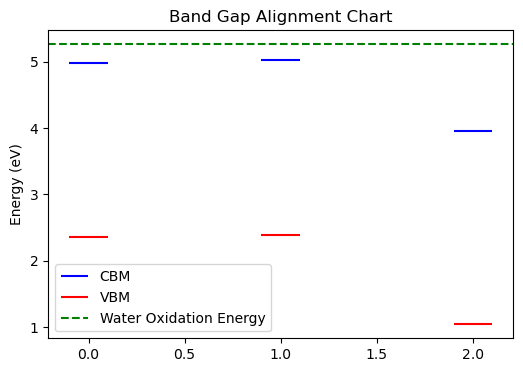

In [25]:
import matplotlib.pyplot as plt

# CBM and VBM energies

# Material names or identifiers


# Water oxidation energy level (adjust as needed for your reference level)
water_oxidation_energy = 5.26

# Create the plot
plt.figure(figsize=(6, 4))

# Plotting CBM and VBM for each material
for i in range(len(materials)):
    plt.hlines(cbm_energy[i], i - 0.1, i + 0.1, colors='blue', label='CBM' if i == 0 else "")
    plt.hlines(adjusted_vbm[i], i - 0.1, i + 0.1, colors='red', label='VBM' if i == 0 else "")

# Adding water oxidation energy line
plt.axhline(y=water_oxidation_energy, color='green', linestyle='--', label='Water Oxidation Energy')

# Adding labels and title
plt.ylabel('Energy (eV)')
plt.title('Band Gap Alignment Chart')
plt.legend()

# Show the plot
plt.show()

In [27]:
print(adjusted_vbm[0])

2.3516


mp-2657
{'direct': True, 'energy': 1.7809999999999997, 'transition': '\\Gamma-\\Gamma'}
4.9826
3.2016
3.481


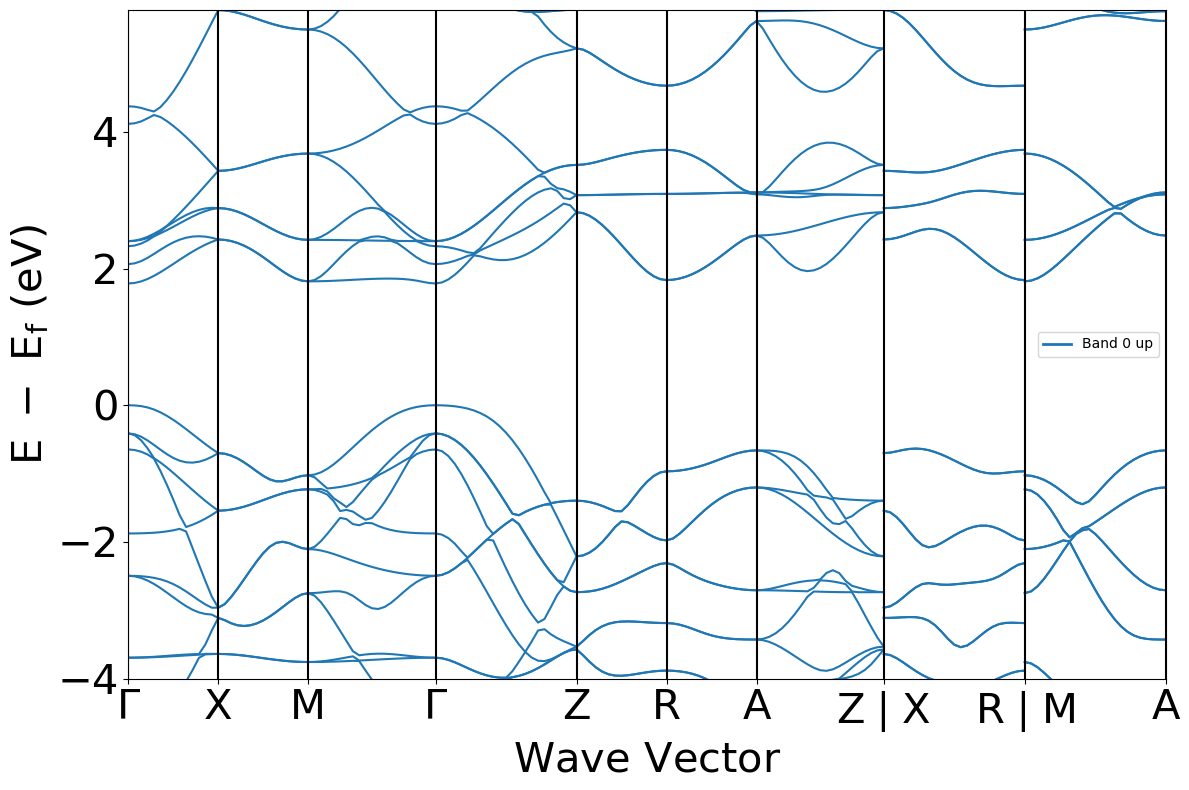

In [29]:
plot_bandstructure(bandstruct[0])
print(materials[0])
print(bandstruct[0].get_band_gap())
print(cbm_energy[0])
print(vbm_energy[0])
fullband = cbm_energy[0] - adjusted_vbm[0]
print(fullband + 0.85)
